# Objetivos

O objetivo principal desta análise é entender como **diligências** ocorrem no processo do Salic. Uma diligência está sempre associada a um projeto e indica uma não-conformidade. Estas não-conformidade se baseiam nas INs (Instrução Normativa) e em pareceres técnicos de organizações vinculadas ao processo do Salic. De forma geral uma diligência é solicitada por um parecerista e o proponente (aquele que é responsável por um projeto) deve responder esta diligência em um determinado tempo.

## Metas

- Predizer quantas diligências um projeto terá em todo o seu ciclo de vida
- Investigar o número total de diligências ao longo do tempo
- Investigar a relação entre áreas e segmentos de projetos e o número de diligências
- Investigar o tempo de resposta das diligências
- Encontrar padrões e distribuições na ocorrência das diligencias

### Importando os dados

In [445]:
import os
import numpy as np
import pandas as pd
import sys

from salicml.utils.dates import Dates

PROJECT_ROOT = os.path.abspath(os.path.join(os.pardir))

**Tabela Diligências**

In [446]:
data_folder = os.path.join(PROJECT_ROOT, 'data', 'raw')
itens_file_name = 'tb_diligencia.csv'
itens_file_path = os.path.join(data_folder, itens_file_name)

#cols = ['idDiligencia', 'idPronac', 'idTipoDiligencia', 'DtSolicitacao', 'idSolicitante', 'DtResposta',
#        'idProponente', 'stEstado', 'idPlanoDistribuicao', 'idArquivo', 'idCodigoDocumentosExigidos',
#        'idProduto', 'stProrrogacao', 'stEnviado']

cols = ['idDiligencia', 'idPronac', 'idTipoDiligencia', 'idSolicitante', 'DtSolicitacao', 'DtResposta', 'idProponente', 'stEnviado']

dt_diligencias = pd.read_csv(itens_file_path, usecols = cols, low_memory=False)
dt_diligencias.head()

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEnviado
0,1,115502,124,2009-09-24 16:52:23,2851,2010-01-18 14:39:07,NaN,S
1,2,114250,124,2009-09-24 18:11:00,2825,2009-10-07 19:45:18,6010.0,S
2,3,115134,124,2009-09-24 18:13:00,2825,2009-10-07 16:10:21,9553.0,S
3,4,114399,124,2009-09-24 18:26:00,2845,2009-10-06 09:30:35,9521.0,S
4,5,115059,124,2009-09-24 18:35:00,2915,2009-10-02 18:01:47,11598.0,S


### Removendo dados com idPronac = 0

Ha algumas diligências com idPronac = 0, mesmo que não haja linhas na tabela Projetos com idPronac = 0. Isso certamente é uma inconsistência/ruído, portanto vamos tirá-la da análise.

In [447]:
dt_diligencias = dt_diligencias[dt_diligencias.loc[:, 'idPronac'] != 0]
display(dt_diligencias[dt_diligencias.loc[:, 'idPronac'] == 0])

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEnviado


**Tabela Projetos**

In [448]:
projetos_csv_name = 'projetos.csv'
projetos_csv = os.path.join(data_folder, projetos_csv_name)
date_column = 'DtProtocolo'
dt_projetos = pd.read_csv(projetos_csv, usecols = ['IdPRONAC', date_column, 'Area', 'Segmento'], low_memory=False)
dt_projetos[date_column] = pd.to_datetime(dt_projetos[date_column], format = Dates.DATE_INPUT_FORMAT)
dt_projetos.head()

,IdPRONAC,Area,Segmento,DtProtocolo
0,1,7,71,2008-09-12
1,2,3,31,2008-09-12
2,3,3,31,2008-09-12
3,4,4,47,2008-09-03
4,5,1,11,2008-09-12


**Números distintos de projetos com pelo menos uma diligência**

In [449]:
projects_with_diligencies = len(dt_diligencias['idPronac'].unique())
print(projects_with_diligencies)

30558


**Número total de projetos no SALIC**

In [450]:
total_projects = len(dt_projetos['IdPRONAC'].unique())
print(total_projects)

210684


### Projetos com pelo menos uma diligência Vs. total de projetos

**Objetivo**

Identificar e visualizar a porcentagem de projetos com pelo menos uma diligência entre todos os projetos.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Conjunto de projetos: projetos com pelo menos uma diligência, todos os projetos |
| y | Número de projetos |

Exemplo: o ponto ('Com diligência', 19000) quer dizer que existem 19 mil projetos com pelo menos uma diligência.

**Conclusão**

Na média *14.5%* dos projetos vão ter pelo menos uma diligência, analisando todos os projetos do banco.

diligencies porcentage = 14.504186364413055


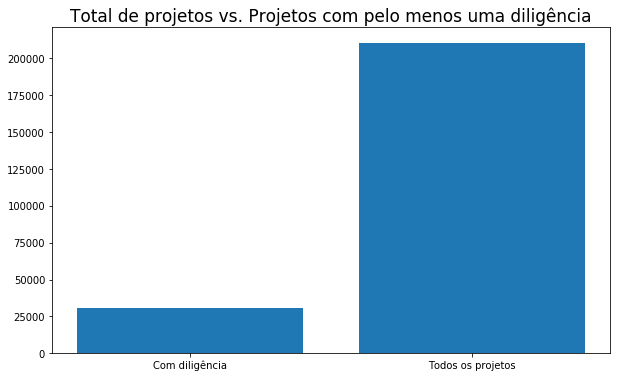

In [ ]:
import matplotlib.pyplot as plt
from salicml.utils.plotter import Plotter


diligencies_porcentage = 100.0 * projects_with_diligencies / total_projects
print('diligencies porcentage = {}'.format(diligencies_porcentage))

dd = {'Com diligência': projects_with_diligencies,
      'Todos os projetos': total_projects}
plt.figure(figsize=(10, 6))
plt.bar(dd.keys(), dd.values())
plt.title('Total de projetos vs. Projetos com pelo menos uma diligência', size=17)
plt.show()

**Tipos distintos de diligência**

In [452]:
display(dt_diligencias['idTipoDiligencia'].unique())

array([124, 126, 181, 183, 171, 563, 564, 172, 180, 179, 174, 627])

### Adicionando data do projeto na tabela de diligências

In [453]:
dt_projetos = dt_projetos.set_index('IdPRONAC')
dt_diligencias = dt_diligencias.join(dt_projetos, on = ['idPronac'])
dt_diligencias.head()

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEnviado,Area,Segmento,DtProtocolo
0,1,115502,124,2009-09-24 16:52:23,2851,2010-01-18 14:39:07,NaN,S,1,11,2009-08-06 16:27:50
1,2,114250,124,2009-09-24 18:11:00,2825,2009-10-07 19:45:18,6010.0,S,3,31,2009-06-29 15:22:16
2,3,115134,124,2009-09-24 18:13:00,2825,2009-10-07 16:10:21,9553.0,S,1,11,2009-07-27 15:44:16
3,4,114399,124,2009-09-24 18:26:00,2845,2009-10-06 09:30:35,9521.0,S,3,32,2009-07-02 15:15:34
4,5,115059,124,2009-09-24 18:35:00,2915,2009-10-02 18:01:47,11598.0,S,3,33,2009-07-23 11:43:45


# Limpando os dados

É conhecido que dados muito antigos (de 1992, por exemplo) podem ser inconsistentes, então vamos filtrar os dados a partir de uma data de início (2013).

In [454]:
from datetime import datetime

START_DATE = datetime(day=1, month=1, year=2013)

dt_projetos = dt_projetos[dt_projetos.loc[:, date_column] >= START_DATE]
dt_diligencias = dt_diligencias[dt_diligencias.loc[:, date_column] >= START_DATE]

## Repetindo o histograma de projetos com pelo menos uma diligência, a partir de 2013

**Objetivo**

Identificar diferenças na porcentagem de projetos com diligências em relação a todos os projetos do banco e dados, e projetos apenas a partir de 2013.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Conjunto de projetos: projetos com pelo menos uma diligência, todos os projetos |
| y | Número de projetos |

Exemplo: o ponto ('Com diligência', 19000) quer dizer que existem 19 mil projetos com pelo menos uma diligência.

**Conclusão**

Na média *35.5%* dos projetos a partir de 2013 vão ter pelo menos uma diligência. Ou seja porcentagem de projetos com pelo menos uma diligência aumentou em **244%**

diligencies porcentage = 35.5119535193828


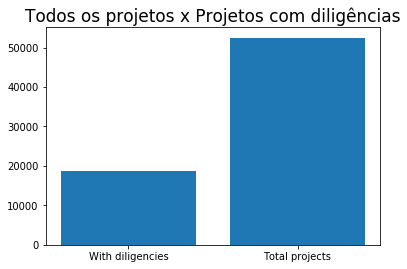

In [455]:
total_projects = len(dt_projetos)
projects_with_diligencies = len(dt_diligencias['idPronac'].unique())

diligencies_porcentage = 100.0 * projects_with_diligencies / total_projects
print('diligencies porcentage = {}'.format(diligencies_porcentage))

dd = {'With diligencies':projects_with_diligencies,
      'Total projects': total_projects}
plt.bar(dd.keys(), dd.values())
plt.title('Todos os projetos x Projetos com diligências', size=17)
plt.show()

## Quantidade média de diligências por projetos entre projetos com pelo menos uma diligência

In [456]:
from scipy import stats

unique, counts = np.unique(dt_diligencias.idPronac.values, return_counts=True)
pd.DataFrame(counts).describe()

,0
count,18642.000000
mean,2.160873
std,1.815752
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,40.000000


## Quantidade média de diligências por projetos entre todos os projetos

In [457]:
pronacs, diligencies = np.unique(dt_diligencias.idPronac.values, return_counts=True)
diligencies_per_project = np.append(diligencies, np.zeros(len(dt_projetos) - len(pronacs), dtype=np.int64))

pd.DataFrame(diligencies_per_project).describe()

,0
count,52495.000000
mean,0.767368
std,1.496705
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,40.000000


### Histograma de quantidade de diligência por projetos entre todos os projetos

**Objetivo**

Conhecer a distribuição do número de diligências entre os projetos.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Número de diligências |
| y | Quantidade de projetos |

Exemplo: o ponto (2, 13000) quer dizer que existem 13 mil projetos com exatamente duas diligências.

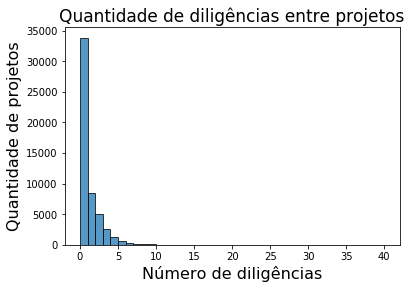

In [458]:
def autolabel(rects, dtype):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if dtype == 'int':
            text = '%d' % int(height)
        else:
            text = '%.2f' % float(height)
            
        plt.text(rect.get_x() + rect.get_width()/2., 1.01 * height,
                text,
                ha='center', va='bottom')
        

diligencies_projects_histogram = plt.hist(diligencies_per_project, edgecolor = 'black', alpha = 0.75,
                                          bins = list(set(diligencies_per_project)))

plt.xlabel('Número de diligências', size=16)
plt.ylabel('Quantidade de projetos', size=16)
plt.title('Quantidade de diligências entre projetos', size=17)
plt.show()

### Histograma de quantidade de diligência por projetos entre projetos com pelo menos uma diligência

**Objetivo**

Conhecer a distribuição do número de diligências entre os proetos.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Número de diligências |
| y | Quantidade de projetos |

Exemplo: o ponto (2, 13000) quer dizer que existem 13 mil projetos com exatamente duas diligências.

**Conclusão**

A distribuição mudou bastante no sentido de que os projetos desde 2013 possuem mais diligências, em particular no intervalo [1, 5] do número de diligências.

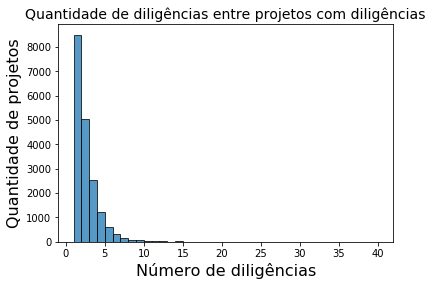

In [459]:
plt.hist(diligencies, edgecolor = 'black', alpha = 0.75, bins = list(set(diligencies)))
plt.xlabel('Número de diligências', size=16)
plt.ylabel('Quantidade de projetos', size=16)
plt.title('Quantidade de diligências entre projetos com diligências', size=14)
plt.show()

## Tempo médio de resposta de uma diligência

**Convertendo datas para datetime**

In [460]:
dt_diligencias['DtSolicitacao'] = pd.to_datetime(dt_diligencias['DtSolicitacao'], format = Dates.DATE_INPUT_FORMAT)
dt_diligencias['DtResposta'] = pd.to_datetime(dt_diligencias['DtResposta'], format = Dates.DATE_INPUT_FORMAT)

dt_diligencias.head()

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEnviado,Area,Segmento,DtProtocolo
14899,15189,159395,124,2013-01-08 10:17:00,2150,2013-01-18 09:34:14,81288.0,S,6,6C,2013-01-07 14:58:42
14900,15190,159405,124,2013-01-08 11:23:00,2151,2013-01-22 14:57:29,1025.0,S,6,6E,2013-01-07 15:34:44
14904,15194,159375,124,2013-01-08 22:03:00,3979,2013-01-15 18:20:04,22139.0,S,3,32,2013-01-03 14:17:59
14916,15206,159482,124,2013-01-10 13:34:00,3888,2013-01-10 16:22:40,716.0,S,6,6E,2013-01-09 15:23:31
14918,15208,159375,124,2013-01-10 15:35:00,3979,2013-01-15 18:20:29,22139.0,S,3,32,2013-01-03 14:17:59


### Tempo médio de resposta de uma diligencia, considerando todas as diligências do banco

In [461]:
solicitation_date = dt_diligencias.DtSolicitacao.values
reply_date = dt_diligencias.DtResposta.values

answer_time = reply_date - solicitation_date
diff_time = [diff.astype('timedelta64[D]') for diff in answer_time]
pd.DataFrame(diff_time).describe()

,0
count,39992
mean,9 days 14:10:16.443288
std,13 days 03:51:35.851692
min,-73 days +00:00:00
25%,0 days 00:00:00
50%,4 days 00:00:00
75%,14 days 00:00:00
max,490 days 00:00:00


### Tempo médio de resposta de uma diligencia, considerando apenas diligencias com data de resposta maior que data de solicitação

In [462]:
solicitation_bigger_then_reply = dt_diligencias['DtSolicitacao'] < dt_diligencias['DtResposta']

solicitation_date = dt_diligencias[solicitation_bigger_then_reply].DtSolicitacao.values
reply_date = dt_diligencias[solicitation_bigger_then_reply].DtResposta.values

answer_time = reply_date - solicitation_date
diff_time = [diff.astype('timedelta64[D]') for diff in answer_time]
pd.DataFrame(diff_time).describe()

,0
count,39911
mean,9 days 15:08:51.733106
std,13 days 02:49:34.705979
min,0 days 00:00:00
25%,0 days 00:00:00
50%,4 days 00:00:00
75%,14 days 00:00:00
max,490 days 00:00:00


## Importando os dados de area dos projetos

### Area

In [463]:
area_file_name = 'area.csv'
area_file_path = os.path.join(data_folder, area_file_name)
dt_area = pd.read_csv(area_file_path, low_memory=False)
print(len(dt_area))
display(dt_area)

8


,Codigo,Descricao,stEstado
0,1,Artes Cênicas,1
1,2,Audiovisual,1
2,3,Música,1
3,4,Artes Visuais,1
4,5,Patrimônio Cultural,1
5,6,Humanidades,1
6,7,Artes Integradas,0
7,9,Museus e Memória,1


## Importando os dados de segmento dos projetos

In [464]:
segmento_file_name = 'segmento.csv'
segmento_file_path = os.path.join(data_folder, segmento_file_name)
dt_segmento = pd.read_csv(segmento_file_path, usecols = ['Codigo', 'Descricao'], low_memory=False)
print(len(dt_segmento))
display(dt_segmento.head())

174


,Codigo,Descricao
0,11,Teatro
1,12,Dança
2,13,Circo
3,14,Ópera
4,15,Mímica


# Quantidade de diligencias por area de projetos

In [465]:
areas_diligencies_dict = dict(zip(*np.unique(dt_diligencias.Area.values, return_counts=True)))
display(areas_diligencies_dict)

areas_diligencies_list = list(areas_diligencies_dict.items())
areas_diligencies_list = sorted(areas_diligencies_list, key = lambda x: x[1])

dt_area = dt_area.set_index('Codigo')
area_name_map = dt_area.Descricao.to_dict()
display(area_name_map)

areas_hist = [(area_name_map[x], y) for x, y in areas_diligencies_list]
display(areas_hist)

{1: 13898, 2: 2629, 3: 11895, 4: 4335, 5: 1807, 6: 5697, 9: 22}

{1: 'Artes Cênicas',
 2: 'Audiovisual',
 3: 'Música',
 4: 'Artes Visuais',
 5: 'Patrimônio Cultural',
 6: 'Humanidades',
 7: 'Artes Integradas',
 9: 'Museus e Memória'}

[('Museus e Memória', 22),
 ('Patrimônio Cultural', 1807),
 ('Audiovisual', 2629),
 ('Artes Visuais', 4335),
 ('Humanidades', 5697),
 ('Música', 11895),
 ('Artes Cênicas', 13898)]

**Objetivo**

Investigar a relação entre número de diligências e área de projeto.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Área do projeto |
| y | Quantidade de diligências |

Exemplo: o ponto ('Humanidades', 9000) quer dizer que existem 9 mil projetos de 'Humanidades' com pelo menos uma diligência.

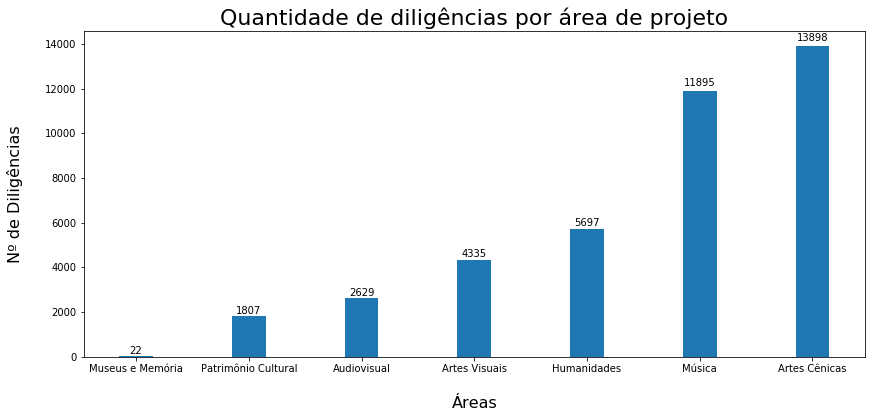

In [466]:
plt.figure(figsize=(14, 6))

plt.xlabel('Áreas', fontsize = 16, labelpad = 22)
plt.ylabel('Nº de Diligências', fontsize = 16, labelpad = 22)
plt.title('Quantidade de diligências por área de projeto', fontsize = 22)

a = plt.bar([x[0] for x in areas_hist], [x[1] for x in areas_hist], align='center', width=0.3)
autolabel(a, 'int')

plt.show()

### Calculando a média de diligencies por area de projeto, entre todos os projetos

In [467]:
print('projects_dict')
projects_dict = dict(zip(*np.unique(dt_projetos.Area.values, return_counts=True)))
display(projects_dict)

print('diligencies_dict')
diligencies_dict = dict(zip(*np.unique(dt_diligencias.Area.values, return_counts=True)))
display(diligencies_dict)

diligencies_per_area_mean = list()

for area in projects_dict.keys():
    if area not in diligencies_dict.keys():
        diligencies_dict[area] = 0
        
    mean = diligencies_dict[area] / projects_dict[area]
    diligencies_per_area_mean.append((area_name_map[area], mean))

diligencies_per_area_mean = sorted(diligencies_per_area_mean, key=lambda x: x[1])
display(diligencies_per_area_mean)

projects_dict


{1: 10112, 2: 2880, 3: 8197, 4: 2895, 5: 947, 6: 4992, 7: 22423, 9: 49}

diligencies_dict


{1: 13898, 2: 2629, 3: 11895, 4: 4335, 5: 1807, 6: 5697, 9: 22}

[('Artes Integradas', 0.0),
 ('Museus e Memória', 0.4489795918367347),
 ('Audiovisual', 0.9128472222222223),
 ('Humanidades', 1.1412259615384615),
 ('Artes Cênicas', 1.3744066455696202),
 ('Música', 1.4511406612175186),
 ('Artes Visuais', 1.4974093264248705),
 ('Patrimônio Cultural', 1.908130939809926)]

### Média de diligencies por area de projeto, entre todos os projetos

**Objetivo**

Apesar de que determinadas áreas, por exemplo 'Artes Cênicas' podem ter bastante diligências, isso não quer dizer que em geral um projeto de 'Artes Cênicas' tem muita diligência, pois pode acontecer de simplesmente ter muitos mais projetos de 'Artes cênicas' do que outras áreas.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Área do projeto |
| y | Valor da média |

Exemplo: o ponto ('Humanidades', 1.14) quer a média (quantidadede de diligências entre todos os projetos de 'Humanidades') / (número de projetos de 'Humanidades') é 1.14

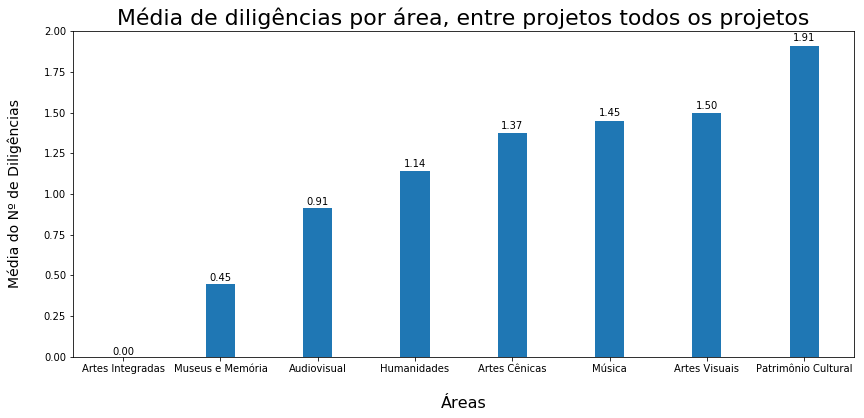

In [468]:
plt.figure(figsize=(14, 6))

plt.xlabel('Áreas', fontsize = 16, labelpad = 22)
plt.ylabel('Média do Nº de Diligências', fontsize = 14, labelpad = 22)
plt.title('Média de diligências por área, entre projetos todos os projetos', fontsize = 22)


a = plt.bar([x[0] for x in diligencies_per_area_mean], [x[1] for x in diligencies_per_area_mean],
            align='center', width=0.3)
autolabel(a, 'float')

### Calculando média de diligencies por area de projeto, entre projetos com pelo menos uma diligência

In [469]:
display(dt_projetos.dtypes)
projects_dict = dict()

for index, row in dt_projetos.iterrows():
    if index in dt_diligencias.idPronac.values:
        area = row['Area']
        
        if area not in projects_dict.keys():
            projects_dict[area] = 0
        
        projects_dict[area] += 1
        
display(projects_dict)

Area                    int64
Segmento               object
DtProtocolo    datetime64[ns]
dtype: object

{4: 1975, 3: 5228, 2: 1455, 6: 3033, 1: 6313, 5: 628, 9: 10}

In [470]:
diligencies_per_area_mean = list()

for area in projects_dict.keys():   
    mean = diligencies_dict[area] / projects_dict[area]
    diligencies_per_area_mean.append((area_name_map[area], mean))

for area in area_name_map.keys():
    if area not in projects_dict.keys():
        diligencies_per_area_mean.append((area_name_map[area], 0.0))
        
diligencies_per_area_mean = sorted(diligencies_per_area_mean, key=lambda x: x[1])
display(diligencies_per_area_mean)

[('Artes Integradas', 0.0),
 ('Audiovisual', 1.806872852233677),
 ('Humanidades', 1.8783382789317506),
 ('Artes Visuais', 2.1949367088607596),
 ('Museus e Memória', 2.2),
 ('Artes Cênicas', 2.2014889909710122),
 ('Música', 2.275248661055853),
 ('Patrimônio Cultural', 2.877388535031847)]

### Média de diligencies por area de projeto, entre projetos com pelo menos uma diligência

**Objetivo**

Muitos projetos nem sequer foram analisados então eles não vão ter diligências. Então áreas de projetos que são populares vão ter uma maior quantidade de projetos, e uma menor média no número de diligências. A média então serve para equilibrar o númeo de diligências em relação aos projetos que já foram analisados.

**Gráfico**

| Eixo | Definição |
| ------------- |:-------------:|
| x | Área do projeto |
| y | Valor da média |

Exemplo: o ponto ('Humanidades', 1.14) quer a média (quantidadede de diligências entre todos os projetos de 'Humanidades') / (número de projetos de 'Humanidades') é 1.14

**Conclusão**

Agora as médias estão bastante uniformes, com baixo desvio padrão da "média das médias". 'Artes Integradas' Fica como um outlier, pois não há nenhuma diligência em nenhum projeto desta área, desde 2013.

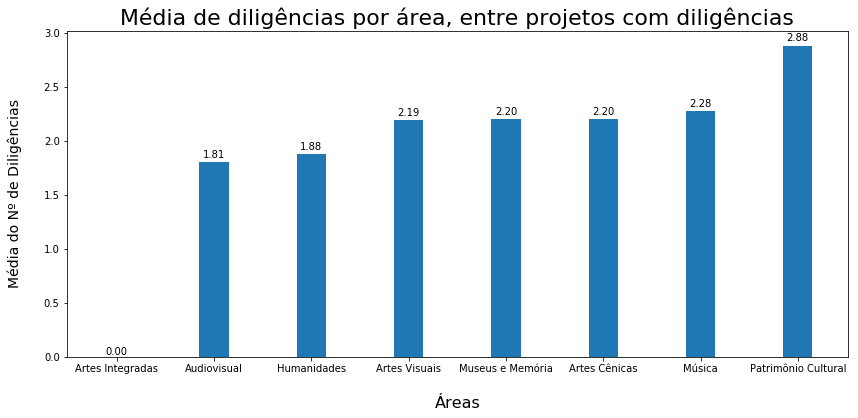

In [471]:
plt.figure(figsize=(14, 6))

plt.xlabel('Áreas', fontsize = 16, labelpad = 22)
plt.ylabel('Média do Nº de Diligências', fontsize = 14, labelpad = 22)
plt.title('Média de diligências por área, entre projetos com diligências', fontsize = 22)

a = plt.bar([x[0] for x in diligencies_per_area_mean], [x[1] for x in diligencies_per_area_mean],
            align='center', width=0.3)
autolabel(a, 'float')

### Calculando a média de diligencies por segmento de projeto, entre todos os projetos

Quando consideramos a média do número de diligências por área de projeto, todas as áreas demonstraram uma média parecida (com biaxo desvio padrão). A investigação continua agora mas considerando os segmentos de cada área, a fim de investigar quais segmentos possuem projetos com grande número de diligências.

In [472]:
display(dt_diligencias.head())

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEnviado,Area,Segmento,DtProtocolo
14899,15189,159395,124,2013-01-08 10:17:00,2150,2013-01-18 09:34:14,81288.0,S,6,6C,2013-01-07 14:58:42
14900,15190,159405,124,2013-01-08 11:23:00,2151,2013-01-22 14:57:29,1025.0,S,6,6E,2013-01-07 15:34:44
14904,15194,159375,124,2013-01-08 22:03:00,3979,2013-01-15 18:20:04,22139.0,S,3,32,2013-01-03 14:17:59
14916,15206,159482,124,2013-01-10 13:34:00,3888,2013-01-10 16:22:40,716.0,S,6,6E,2013-01-09 15:23:31
14918,15208,159375,124,2013-01-10 15:35:00,3979,2013-01-15 18:20:29,22139.0,S,3,32,2013-01-03 14:17:59


In [473]:
segmentos_diligencies_dict = dict(zip(*np.unique(dt_diligencias.Segmento.values, return_counts=True)))

segmentos_diligencies_list = list(segmentos_diligencies_dict.items())
segmentos_diligencies_list = sorted(segmentos_diligencies_list, key = lambda x: x[1])

dt_segmento = dt_segmento.set_index('Codigo')
segmento_name_map = dt_segmento.Descricao.to_dict()
display(list(segmento_name_map.items())[:5])

segmento_hist = [(segmento_name_map[x], y) for x, y in segmentos_diligencies_list]
display(segmento_hist[:5])

[('11', 'Teatro'),
 ('12', 'Dança'),
 ('13', 'Circo'),
 ('14', 'Ópera'),
 ('15', 'Mímica')]

[('Teatro de formas animadas', 1),
 ('Ações de capacitação e treinamento de pessoal', 1),
 ('Treinamento  pessoal/aquis.equip. p/manut. Acervos', 1),
 ('Aquis.equip. p/manut. acervos de bibliot. Públicas', 1),
 ('Exposições realizadas em museus', 1)]

In [474]:
display(dt_projetos.dtypes)
display(dt_projetos.columns)
project_count_per_segment = dict()

for index, row in dt_projetos.iterrows():
    if index in dt_diligencias.idPronac.values:
        segmento_codigo = row['Segmento']
        
        if segmento_codigo not in project_count_per_segment.keys():
            project_count_per_segment[segmento_codigo] = 0
        
        project_count_per_segment[segmento_codigo] += 1

Area                    int64
Segmento               object
DtProtocolo    datetime64[ns]
dtype: object

Index(['Area', 'Segmento', 'DtProtocolo'], dtype='object')

In [475]:
diligencies_per_segmento_mean = list()

for segmento in segmentos_diligencies_dict.keys():   
    mean = segmentos_diligencies_dict[segmento] /  project_count_per_segment[segmento]
    diligencies_per_segmento_mean.append((segmento, mean))
        
diligencies_per_segmento_mean = sorted(diligencies_per_segmento_mean, key=lambda x: x[1])
display(diligencies_per_segmento_mean[-5:])

[('5K', 3.6559139784946235),
 ('5I', 3.7872340425531914),
 ('5O', 4.4),
 ('5R', 4.571428571428571),
 ('9O', 5.0)]

### Plotando a média do número de diligências por segmento de projeto

Existem mais de 170 tipos distintos de segmentos, para visualizar as médias de
cada segmento utilizamos no eixo `x` como o código do segmento do projeto, por exemplo
'11', que significa 'Teatro'. No eixo `y` é um numero racional indicando o valor
da média. Cada ponto no gráfico é um circulo com raio proporcional ao valor da
média, ou seja segmentos com maiores valores na média vão ter um circulo com
área/raio maior. Colocamos o código no eixo `x` em vez de o nome do segmento em si
por uma questão de espaço.

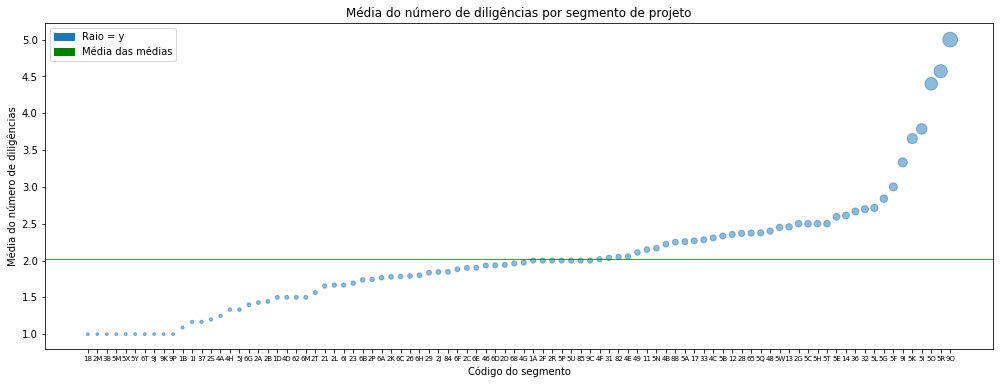

In [476]:
x_segmento, y_mean = zip(*diligencies_per_segmento_mean)
s = np.array(y_mean) + 1.0

plt.figure(figsize=(17, 6))
ax = plt.subplot(111)
ax.xaxis.set_tick_params(labelsize=7)
plt.scatter(x = x_segmento, y = y_mean, s = s ** 3, alpha = .5)
plt.axhline(y=np.mean(y_mean), color='g', linestyle='-', linewidth=.75)

import matplotlib.patches as mpatches
radius_patch = mpatches.Patch(color='C0', label='Raio = y')
line_patch = mpatches.Patch(color='g', label='Média das médias')
plt.legend(handles=[red_patch, line_patch])

plt.title('Média do número de diligências por segmento de projeto')
plt.xlabel('Código do segmento')
plt.ylabel('Média do número de diligências')
plt.show()

# Conclusões

Filtrando os projetos apenas de 2013 em diante, 35% dos projetos teriam pelo menos uma diligência, um valor 144% maior do que a média de 14% em relação a análise sem filtrar os projetos por data. Segundo os dados da tabela analisada, o número médio de diligências entre projetos com pelo menos uma diligência é de 2.16, um número abaixo do esperado, pode ser que este número seja maior se a mesma análise for feita considerando apenas projetos finalizados. Projetos com mais de 5 diligências podem ser considerados outliers.

Analisando as diligências por área de projeto mostrou que a médias dos números de diligência por área de projeto podiam divergir bastante (média de 1.91 para 'Patrimônio Cultural' e média de 0.45 para 'Museus e Memória'), porém quando esta média foi calculada considerando apenas projetos com pelo menos uma diligência as médias ficaram similares: todas entre 1.81 e 2.88.

## Contribuções futuras

As diligências não foram analisadas por etapa de projeto (admissão, análise financeira, análise de objeto etc), fazer esta análise por etapa pode identificar padrões interessantes. Outra análise que pode ser feita é apenas sobreprojetos que já foram finalizados, pois muitos projetos podem ter pouca ou nenenhuma diligência simplesmente porque ainda não foram finalizados.